In [1]:
#Step 1: Setup Google Drive and Install Dependencies


# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install necessary libraries
!pip install tensorflow pandas scikit-learn matplotlib


Mounted at /content/drive


In [2]:
#Step 2: Data Loading and Exploration

import pandas as pd

# Load the CSV file
file_path = '/content/drive/My Drive/ai_project/resume_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Loaded. First few rows:")
print(df.head())

# Display dataset information
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Loaded. First few rows:
       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None

Missing Values:
Category    0
Resume      0
dtype: int64


In [8]:
# Dataset Analysis
categories = df['Category'].value_counts().reset_index()
categories

,Category,count
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


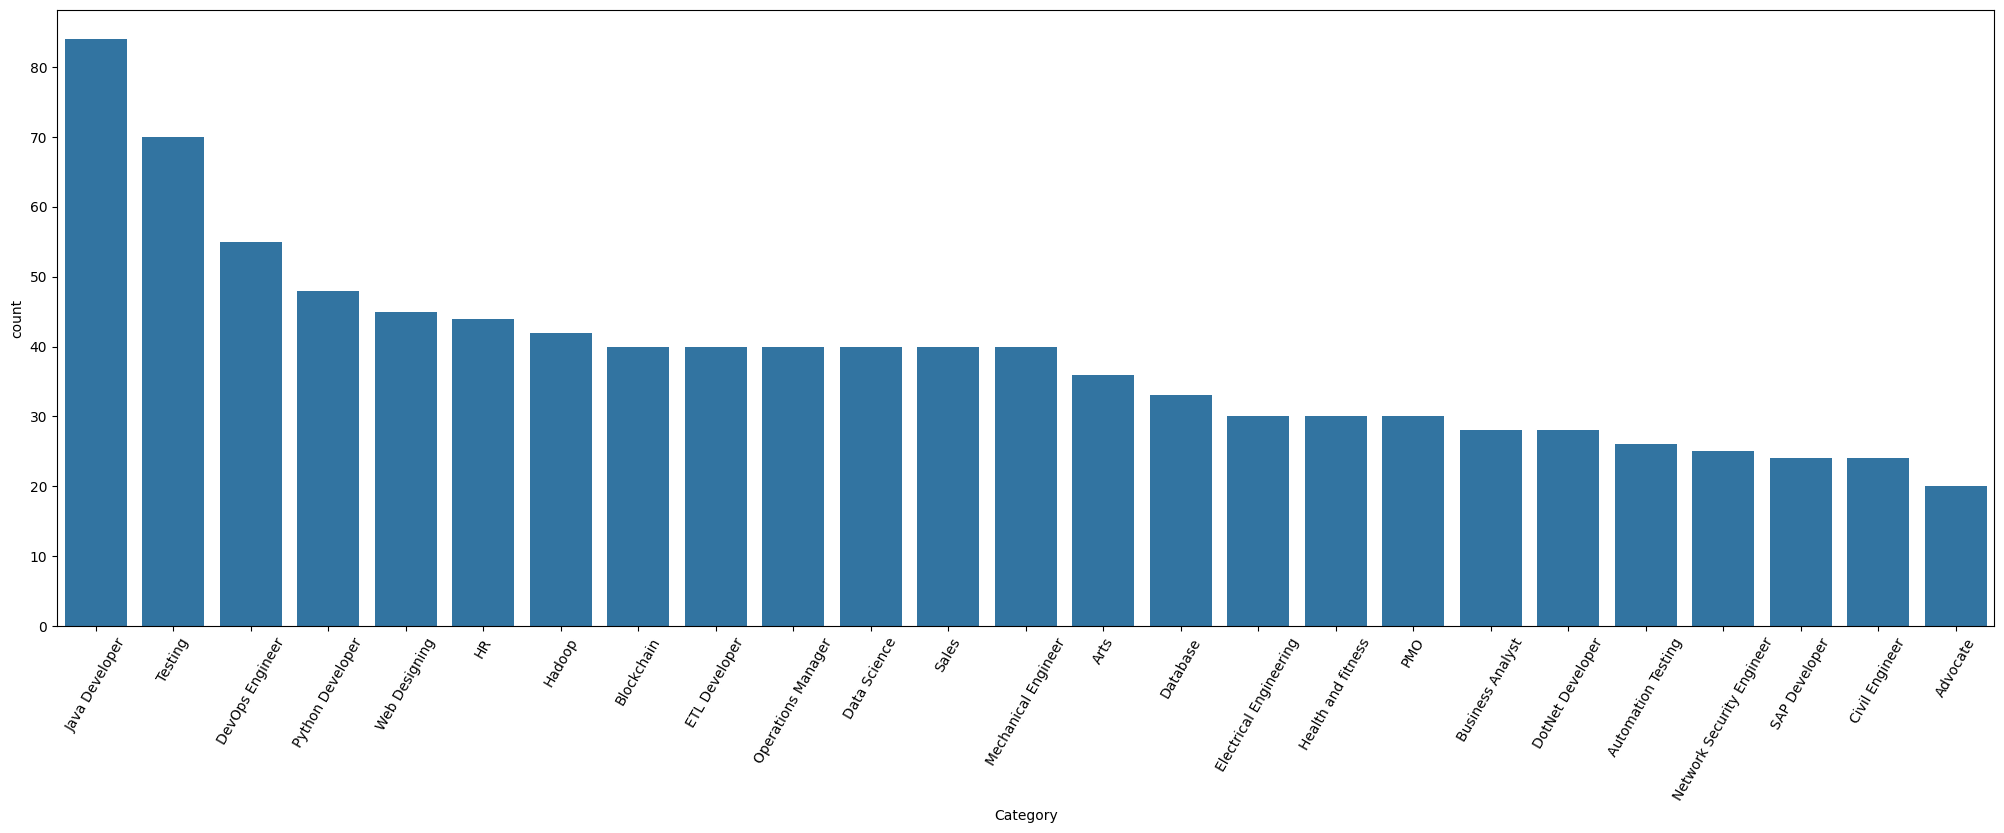

In [11]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(25,8))
# plt.xticks(rotation=60)
# # count plot on single categorical variable
# sns.countplot(x ='Category', data= df, order= df['Category'].value_counts().index)

# # Show the plot
# plt.show()

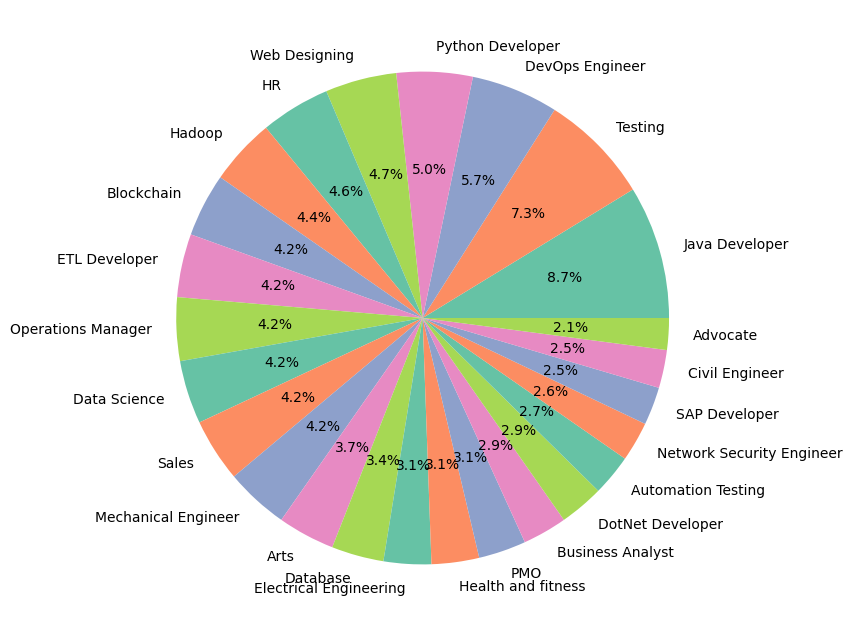

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase figure size if necessary
plt.figure(figsize=(25,8))

# Define a lighter color palette
colors = sns.color_palette('Set2')[0:5]  # Use a lighter pre-built palette like 'Set2'

# Create pie chart
plt.pie(categories['count'], labels=categories['Category'], colors=colors, autopct='%.1f%%')

# Display chart
plt.show()


In [4]:
#Step 3: Text Preprocessing

import re
import numpy as np

# Function for text preprocessing
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenization: Splitting text into words
    tokens = text.split()

    return ' '.join(tokens)

# Apply preprocessing to the 'Resume' column
df['cleaned_resume'] = df['Resume'].apply(preprocess_text)

# Display the cleaned data
print("\nPreprocessed Resumes (First few):")
print(df['cleaned_resume'].head())



Preprocessed Resumes (First few):
0    skills programming languages python pandas num...
1    education details may to may be uitrgpv data s...
2    areas of interest deep learning control system...
3    skills r python sap hana tableau sap hana sql ...
4    education details mca ymcaust faridabad haryan...
Name: cleaned_resume, dtype: object


## Word Cloud Representation

In [25]:
sentences = df['cleaned_resume'].values
cleanedSentences = ""
for value in sentences:
  cleanedSentences += value

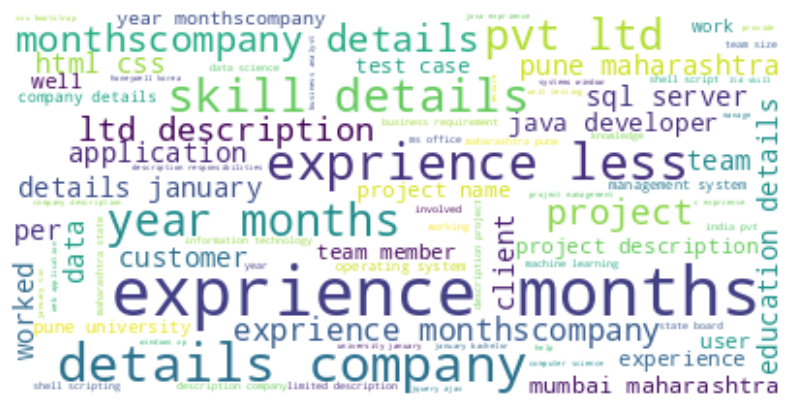

In [27]:
# Word Cloud Representation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud with a white background
wordcloud = WordCloud(background_color='white').generate(cleanedSentences)

# Display the word cloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [5]:
#Step 4: Label Encoding

from sklearn.preprocessing import LabelEncoder

# Encode the target variable (Categories)
label_encoder = LabelEncoder()
df['Category_encoded'] = label_encoder.fit_transform(df['Category'])

# Display the unique categories and their corresponding encoded values
print("\nCategories and Encoded Labels:")
categories = dict(zip(df['Category'], df['Category_encoded']))
print(categories)



Categories and Encoded Labels:
{'Data Science': 6, 'HR': 12, 'Advocate': 0, 'Arts': 1, 'Web Designing': 24, 'Mechanical Engineer': 16, 'Sales': 22, 'Health and fitness': 14, 'Civil Engineer': 5, 'Java Developer': 15, 'Business Analyst': 4, 'SAP Developer': 21, 'Automation Testing': 2, 'Electrical Engineering': 11, 'Operations Manager': 18, 'Python Developer': 20, 'DevOps Engineer': 8, 'Network Security Engineer': 17, 'PMO': 19, 'Database': 7, 'Hadoop': 13, 'ETL Developer': 10, 'DotNet Developer': 9, 'Blockchain': 3, 'Testing': 23}


In [6]:
#Step 5: Text Vectorization using Keras Tokenizer

from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Tokenization and Vectorization using Keras
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['cleaned_resume'])

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(df['cleaned_resume'])

# Padding sequences to ensure uniform input size
X = pad_sequences(sequences, maxlen=600)

# Target variable
y = df['Category_encoded'].values

# Display tokenized and padded data
print("\nSample of Tokenized & Padded Resume:")
print(X[0])
print("\nCorresponding Label:", y[0])



Sample of Tokenized & Padded Resume:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0   47  256
  240   73 2057 1198 4376 2794 2290   45   42 4377  186  184  442 2795
 3076 3077 2796 2797 3570  648  761  412  122  543 4378 1511  122 3078
  428  400 4379 2291 1656 1230 4380 4381 1199   25 4382   85 2058 2798
  927 4383 4384 3248 2290  878 1830  674 3249  104  147  518   73 2292
  413 3250  102 1250 1099 2799    1  213    3  762   13   17  120 1864
 1742   17  120 1864 1742 4252 3008 1587   36   13  161    7   11  164
    7   11   73    7   64   13    9 4252 3008 1587   12 1743 4385    1
   46 1864   86 3079  191 4386   86 3079  191 2516    5    2  191   53
    1 1073  294    1  392   51  236  796    3   15   19 4253    5  136
  469  191  196  250   26 3080    6 1046 1200 1047   90  250 1493 1283
    1 1656 1230   31 1831  594    5 3571 2517  842    1   88  360    2
  191  302    2  194    4  194  406    

In [7]:
#Step 6: Data Splitting into Train, Validation, and Test Sets

from sklearn.model_selection import train_test_split

# Split the data into train, validation, and test sets (70%, 15%, 15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print dataset sizes
print(f"Training Set Size: {len(X_train)}")
print(f"Validation Set Size: {len(X_val)}")
print(f"Test Set Size: {len(X_test)}")


Training Set Size: 673
Validation Set Size: 144
Test Set Size: 145


In [29]:
# Other models:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Machine' : SVC(),
    'Random Forest' : RandomForestClassifier()
}



In [30]:
model_list=[]
for model in models.values():
    model_list.append(OneVsRestClassifier(model))
model_list

[OneVsRestClassifier(estimator=KNeighborsClassifier()),
 OneVsRestClassifier(estimator=LogisticRegression()),
 OneVsRestClassifier(estimator=SVC()),
 OneVsRestClassifier(estimator=RandomForestClassifier())]

In [33]:
for i in model_list:
    i.fit(X_train, y_train)
    print(f'{i} trained')

print("-"*60)
print("all models trained")

OneVsRestClassifier(estimator=KNeighborsClassifier()) trained
OneVsRestClassifier(estimator=LogisticRegression()) trained
OneVsRestClassifier(estimator=SVC()) trained
OneVsRestClassifier(estimator=RandomForestClassifier()) trained
------------------------------------------------------------
all models trained


In [34]:
for count, value in enumerate(model_list):
    print(f"Accuracy of {value} on training set :", model_list[count].score(X_train, y_train))
    print(f"Accuracy of {value} on test set :", model_list[count].score(X_test, y_test))
    print("-"*100)

print("all scores calculated")

Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on training set : 0.9197622585438335
Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on test set : 0.8344827586206897
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on test set : 0.9448275862068966
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=SVC()) on training set : 0.9910846953937593
Accuracy of OneVsRestClassifier(estimator=SVC()) on test set : 0.9448275862068966
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=RandomForest

In [35]:
from sklearn.metrics import classification_report
for count, value in enumerate(model_list):
    print(f'{value} classification report')
    print("-"*80)
    print(classification_report(y_test, model_list[count].predict(X_test)))
    print("*"*100)
    print(" ")

OneVsRestClassifier(estimator=KNeighborsClassifier()) classification report
--------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      1.00      1.00         6
           2       1.00      0.50      0.67         4
           3       1.00      1.00      1.00         6
           4       1.00      0.50      0.67         4
           5       0.00      0.00      0.00         3
           6       0.75      0.50      0.60         6
           7       0.50      0.20      0.29         5
           8       0.90      1.00      0.95         9
           9       1.00      0.25      0.40         4
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         4
          12       0.33      0.71      0.45         7
          13       0.86      0.86      0.86         7
          14       1.00      1.00      1.00         4
          15       0.65      1.00      0.79        13
          16       1.00      1.00      1.00         6
          17       0.67    

In [ ]:
#Step 7: LSTM Model Definition

from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout

# LSTM Model Definition
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=600))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
print("\nLSTM Model Summary:")
model.summary()



LSTM Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Step 8: Model Training with Early Stopping and Checkpointing

from keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping and model checkpoint
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stop, checkpoint])

# Save model, tokenizer, and label encoder
model.save('resume_screening_model.keras')
import pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8368 - loss: 0.5892 - val_accuracy: 0.9653 - val_loss: 0.3633
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8707 - loss: 0.4991 - val_accuracy: 0.9861 - val_loss: 0.2958
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9133 - loss: 0.4150 - val_accuracy: 0.9792 - val_loss: 0.2237
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9060 - loss: 0.3403 - val_accuracy: 0.9861 - val_loss: 0.1788
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9512 - loss: 0.2720 - val_accuracy: 0.9861 - val_loss: 0.1300
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9410 - loss: 0.2386 - val_accuracy: 0.9861 - val_loss: 0.1069
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9688 - loss: 0.1957 - val_accuracy: 0.9861 - val_loss: 0.1192
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9805 - loss: 0.1460 - val_accuracy: 0.9861 - val_loss:

In [ ]:
#Step 9: Model Evaluation

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 0.9779 - loss: 0.1259

Test Loss: 0.12422683835029602
Test Accuracy: 0.9793103337287903


In [ ]:
#Step 10: Predictions on New Resumes

def predict_resume_category(resume_text):
    # Preprocess the new resume
    cleaned_text = preprocess_text(resume_text)

    # Tokenize and pad
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded_sequence = pad_sequences(sequence, maxlen=200)

    # Make prediction
    prediction = model.predict(padded_sequence)
    predicted_label = np.argmax(prediction, axis=1)

    # Convert label to category
    category = label_encoder.inverse_transform(predicted_label)[0]

    return category

# Test the function
sample_resume = "Python, SQL, JavaScript, Machine Learning, NLP"
predicted_category = predict_resume_category(sample_resume)
print(f"\nPredicted Category for Sample Resume: {predicted_category}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step

Predicted Category for Sample Resume: PMO


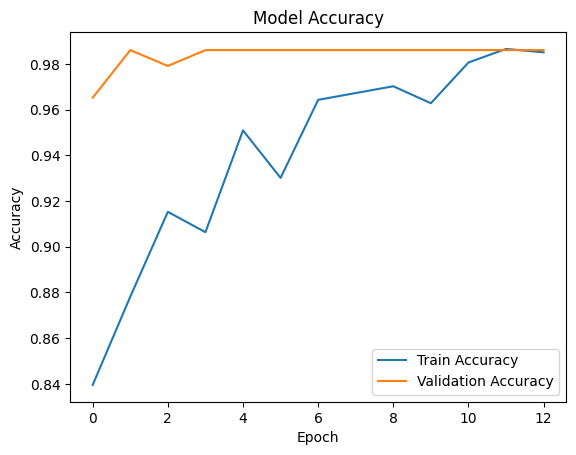

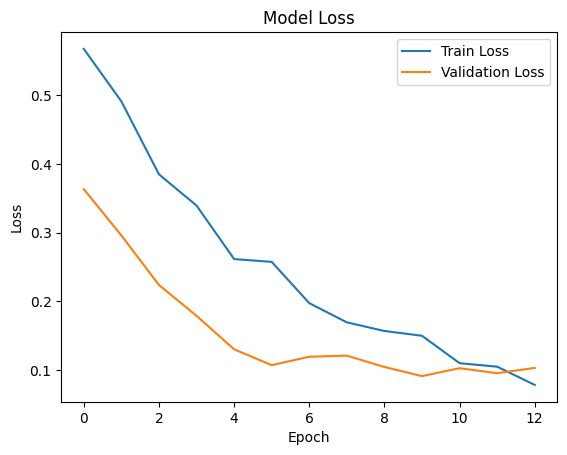

In [ ]:
#Step 11: Visualization of Training History

import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [ ]:
################################################################################

In [ ]:
#loading the saved model for inference


from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
import pickle
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# Load the model
model_path = '/content/drive/MyDrive/ai_project/resume_screening_model.keras'
model = tf.keras.models.load_model(model_path)

# Load the tokenizer
with open('/content/drive/MyDrive/ai_project/tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Load the label encoder
with open('/content/drive/MyDrive/ai_project/label_encoder.pkl', 'rb') as handle:
    label_encoder = pickle.load(handle)


Mounted at /content/drive


In [ ]:

def predict_category_with_probabilities(resume_text):
    # Preprocess the resume text
    resume_text = [resume_text]
    seq = tokenizer.texts_to_sequences(resume_text)
    padded = pad_sequences(seq, maxlen=600)  # Keep the max_words to 600

    # Predict probabilities for all categories
    probabilities = model.predict(padded)[0]  # The output will be a list of probabilities

    # Get the predicted category with the highest probability
    predicted_label_index = np.argmax(probabilities)
    predicted_category = label_encoder.inverse_transform([predicted_label_index])[0]

    # Map each category to its probability
    category_probabilities = {label_encoder.classes_[i]: probabilities[i] for i in range(len(probabilities))}

    return predicted_category, category_probabilities



In [ ]:

# Example resume text
resume_text = """Skills * Programming Languages: Python, SQL, Java * Machine Learning: SVM, KNN, Random Forest, Decision Trees. * Database: MySQL, SQLServer, Cassandra, Elasticsearch. * Tools: Git, Docker, Flask, OpenCV."""

# Predict category and get probabilities for all categories
predicted_category, category_probabilities = predict_category_with_probabilities(resume_text)

print(f"The predicted category is: {predicted_category}")
print("Probabilities for all categories:")
for category, prob in category_probabilities.items():
    print(f"{category}: {prob:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
The predicted category is: Business Analyst
Probabilities for all categories:
Advocate: 0.0000
Arts: 0.0000
Automation Testing: 0.0000
Blockchain: 0.0002
Business Analyst: 0.5681
Civil Engineer: 0.0001
Data Science: 0.0010
Database: 0.0002
DevOps Engineer: 0.0012
DotNet Developer: 0.0031
ETL Developer: 0.0000
Electrical Engineering: 0.0000
HR: 0.0104
Hadoop: 0.0001
Health and fitness: 0.0063
Java Developer: 0.0351
Mechanical Engineer: 0.0000
Network Security Engineer: 0.0010
Operations Manager: 0.0002
PMO: 0.0017
Python Developer: 0.2313
SAP Developer: 0.0004
Sales: 0.0030
Testing: 0.0005
Web Designing: 0.1360
